In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [30]:
from google.colab import files

In [ ]:
df = pd.read_csv(r"C:\Users\spuya\OneDrive\Documents\CV again2.CSV")

df

,Voltage,Current
0,1.000977,0.711060
1,1.001587,0.590210
2,1.004333,0.509949
3,1.006775,0.522461
4,1.009216,0.593567
...,...,...
569,1.011353,-0.264282
570,1.009216,-0.106506
571,1.007385,0.020142
572,1.004028,0.129700


In [ ]:
potential = df.iloc[:,0].values
current = df.iloc[:,1].values
smoothed_current = savgol_filter(current, window_length=15, polyorder=2)
#current = savgol_filter(df_filtered.iloc[:,1], window_length=15, polyorder=2)

dI_dV = np.gradient(smoothed_current, potential)

threshold = max(dI_dV) * 0.02
onset_index = np.where(dI_dV > threshold)[0]
#E_onset = potential[onset_index]

E_onset = potential[onset_index[0]] if len(onset_index) > 0 else None

E_onset

np.float64(1.000976563)

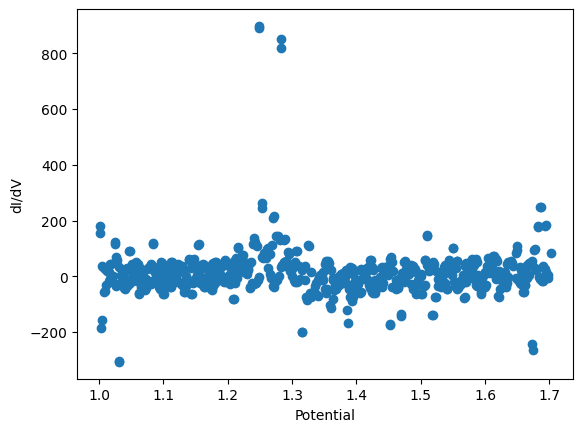

In [ ]:
plt.scatter(potential, dI_dV)
plt.xlabel('Potential')
plt.ylabel('dI/dV')
plt.show()

In [ ]:
df2 = pd.read_csv(r"C:\Users\spuya\OneDrive\Documents\photodimerization\Uyangoren UV Vis 04-04-2025.txt", delimiter=",")

df2

,Wavelength nm.,0 mins pan sean - RawData,15 mins pan sean - RawData,30 mins pan sean - RawData,60 mins pan sean - RawData,90 mins pan sean - RawData,heated 30 mins 90 degrees - RawData
0,200.0,0.844,1.055,1.336,1.271,1.304,0.596
1,201.0,2.387,1.186,1.063,1.100,1.493,1.468
2,202.0,2.357,0.831,1.372,0.785,0.652,0.784
3,203.0,1.744,0.504,1.092,0.973,1.279,0.808
4,204.0,0.910,0.688,0.624,0.833,1.846,0.795
...,...,...,...,...,...,...,...
596,796.0,0.036,0.019,-0.012,-0.062,-0.066,-0.066
597,797.0,0.036,0.019,-0.012,-0.062,-0.066,-0.067
598,798.0,0.037,0.019,-0.012,-0.063,-0.067,-0.067
599,799.0,0.037,0.019,-0.012,-0.063,-0.067,-0.067


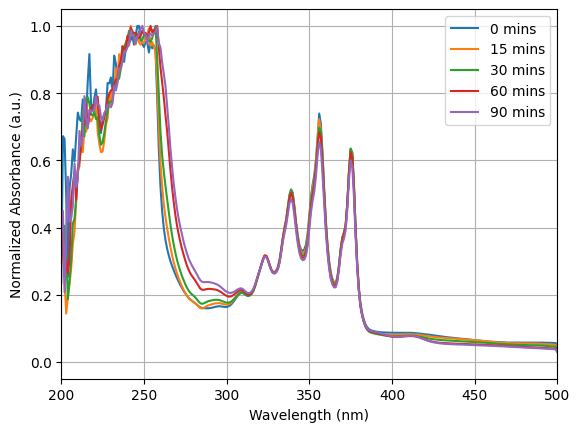

In [ ]:
wavelength = df2['Wavelength nm.']
Abs_0 = df2['0 mins pan sean - RawData']
Abs_15 = df2['15 mins pan sean - RawData']
Abs_30 = df2['30 mins pan sean - RawData']
Abs_60 = df2['60 mins pan sean - RawData']
Abs_90 = df2['90 mins pan sean - RawData']
Abs_heated = df2['heated 30 mins 90 degrees - RawData']

norm_Abs_0 = np.absolute((Abs_0 - np.min(Abs_0))/(np.max(Abs_0) - np.min(Abs_0)))
norm_Abs_15 = np.absolute((Abs_15 - np.min(Abs_15))/(np.max(Abs_15) - np.min(Abs_15)))
norm_Abs_30 = np.absolute((Abs_30 - np.min(Abs_30))/(np.max(Abs_30) - np.min(Abs_30)))
norm_Abs_60 = np.absolute((Abs_60 - np.min(Abs_60))/(np.max(Abs_60) - np.min(Abs_60)))
norm_Abs_90 = np.absolute((Abs_90 - np.min(Abs_90))/(np.max(Abs_90) - np.min(Abs_90)))
norm_Abs_heated = np.absolute((Abs_heated - np.min(Abs_heated))/(np.max(Abs_heated) - np.min(Abs_heated)))




plt.plot(wavelength, norm_Abs_0, label="0 mins")
plt.plot(wavelength, norm_Abs_15, label='15 mins')
plt.plot(wavelength, norm_Abs_30, label='30 mins')
plt.plot(wavelength, norm_Abs_60, label='60 mins')
plt.plot(wavelength, norm_Abs_90, label='90 mins')

plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized Absorbance (a.u.)")
plt.xlim(200, 500)

plt.legend()
plt.grid()

plt.show()

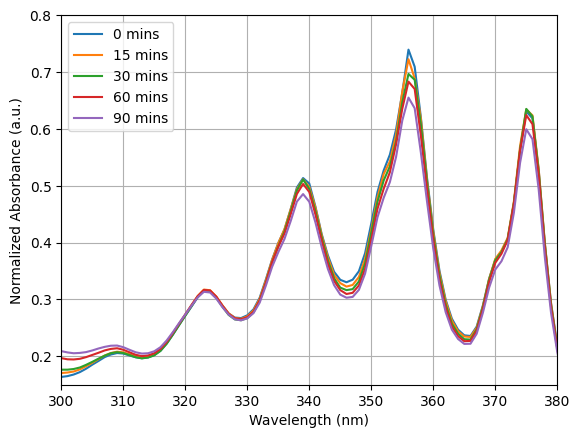

In [ ]:
plt.plot(wavelength, norm_Abs_0, label="0 mins")
plt.plot(wavelength, norm_Abs_15, label='15 mins')
plt.plot(wavelength, norm_Abs_30, label='30 mins')
plt.plot(wavelength, norm_Abs_60, label='60 mins')
plt.plot(wavelength, norm_Abs_90, label='90 mins')

plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized Absorbance (a.u.)")
plt.xlim(300,380)
plt.ylim(0.15, 0.8)

plt.legend()
plt.grid()

plt.show()

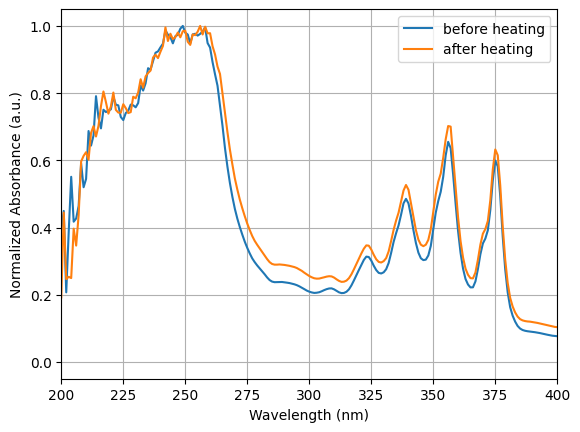

In [ ]:
plt.plot(wavelength, norm_Abs_90, label="before heating")
plt.plot(wavelength, norm_Abs_heated, label="after heating")

plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized Absorbance (a.u.)")
plt.xlim(200, 400)
#plt.ylim(0.1, 0.8)

plt.legend()
plt.grid()

plt.show()

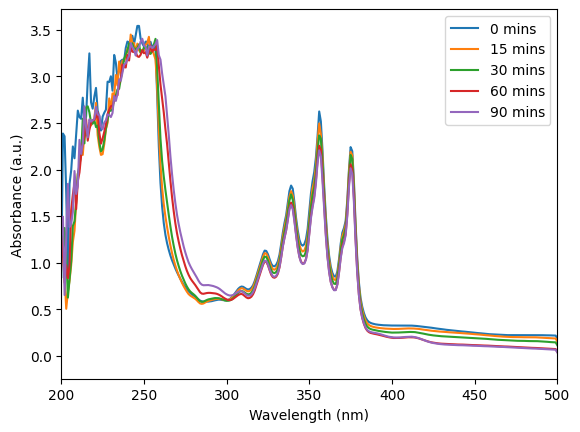

In [ ]:
plt.plot(wavelength, Abs_0, label="0 mins")
plt.plot(wavelength, Abs_15, label='15 mins')
plt.plot(wavelength, Abs_30, label='30 mins')
plt.plot(wavelength, Abs_60, label='60 mins')
plt.plot(wavelength, Abs_90, label='90 mins')

plt.xlabel("Wavelength (nm)")
plt.ylabel("Absorbance (a.u.)")
plt.xlim(200, 500)

plt.legend()

plt.show()

In [3]:
#df_ftir = pd.read_csv(r"C:\Users\spuya\OneDrive\Documents\polyanthracene-s1.txt", delimiter=" ")

df_ftir = pd.read_csv("/content/drive/My Drive/pan_ftir.txt", delimiter=" ")

df_ftir

,wavenumber,%T,Unnamed: 2
0,648.082176,90.313903,NaN
1,650.010992,88.821241,NaN
2,651.939808,85.583581,NaN
3,653.868624,83.897749,NaN
4,655.797440,86.243979,NaN
...,...,...,...
1734,3992.649120,96.000284,NaN
1735,3994.577936,95.999792,NaN
1736,3996.506752,95.939520,NaN
1737,3998.435568,95.872276,NaN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

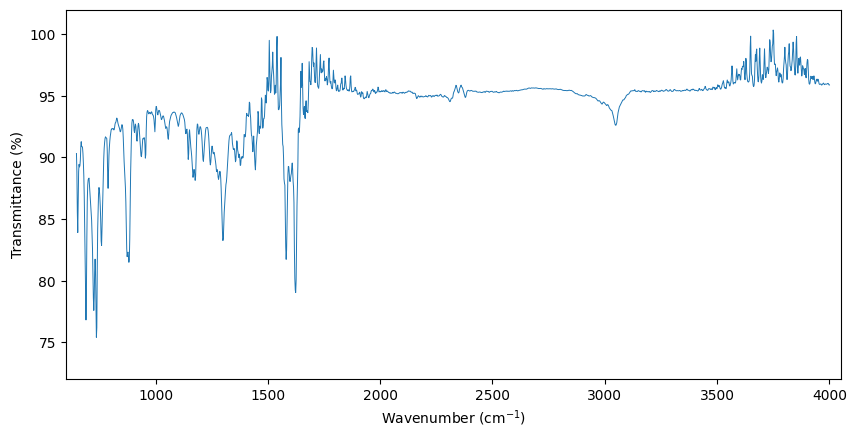

In [31]:
wavenumber = df_ftir['wavenumber']
transmission = df_ftir['%T']

plt.figure(figsize=(10, 4.8))
plt.plot(wavenumber, transmission, linewidth=0.7)
plt.xlabel("Wavenumber (cm$^{-1}$)")
plt.ylabel("Transmittance (%)")

plt.ylim(72,102)
plt.xlim(600, 4050)

#plt.savefig('ftir_plot.png')
files.download('ftir_plot.png')
plt.show()



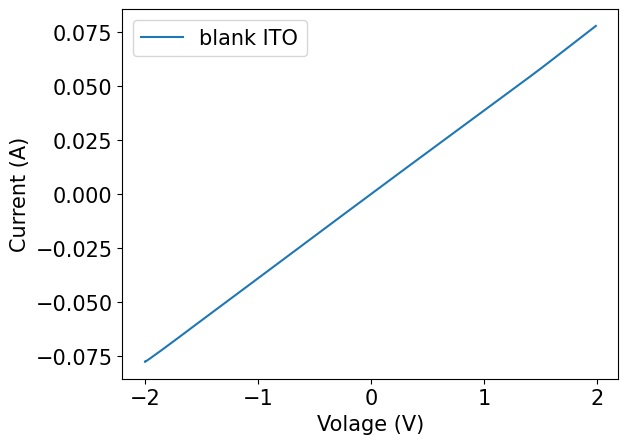

In [ ]:
df_ITO = pd.read_csv(r"C:\spuyangoren\COLLEGE\Lab\IPL\Sync.Bio.Optics\Electrical response\THESIS\03-17-2025\FINAL DATA.csv")

plt.plot(df_ITO['Blank1_V'], df_ITO['Blank1_I'], label="blank ITO")
plt.plot(df_ITO['Blank1_V'], df_ITO['Blank1_I'], label="blank ITO")

plt.xlabel("Volage (V)", fontsize=15)
plt.ylabel("Current (A)", fontsize=15)

plt.tick_params(labelsize=15)

plt.legend(fontsize=15)


plt.show()